# 2) Design of RBF NN based on Gaussian kernel functions with constant spread function and using all the points in the training set as centers of the RB functions.

This code generates a dataset with 441 samples. Each sample has two features represented by the coordinates (x, y) in the range of -2 to 2. The labels for the samples are assigned based on whether the sample falls within a circle with radius 1 centered at the origin.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize dataset

In [103]:
# initialize dataset
# Generate training data by randomly sampling
'''
To ensure unbiased evaluation, the testing data was selected randomly from the remaining around 20% of the dataset.
'''
import numpy as np

in_list = []
out_list = []
for i in range (352):
    x= np.random.randint(0,21)
    y= np.random.randint(0,21)


    x1 = -2 +0.2*x
    y1 = -2 + 0.2*y

    if ((x1 ** 2 + y1 **2) <=1):
        out_list .append(1)
    else:
        out_list.append(-1)

    in_list.append([x1,y1])

in_list=np.array(in_list)
out_list=np.array(out_list)


# train/test spliting data

In [104]:
#processes the sampled data from the previous code, splitting it into training and testing datasets.
'''
Splitting the 441 dataset into 80% to training and 20% to testing
Hence 352 samples considered for training

'''
# Generate test input and output lists
testin_list = np.array([[-2 + 0.2 * np.random.randint(0, 21), -2 + 0.2 * np.random.randint(0, 21)] for _ in range(89)])
testout_list = np.where(np.linalg.norm(testin_list, axis=1) <= 1, 1, -1)

# Finding the distance

In [105]:
def distance(point1, point2):
    """Calculate the squared Euclidean distance between two points {||x-c||^2}."""
    dist = np.linalg.norm(point1 - point2) ** 2
    return dist

# Defining the gaussian

In [106]:
def gaussian(input_samples, centers, sigma):
    """
    Calculate the Gaussian matrix given input samples, centers, and sigma.
    The Gaussian matrix has dimensions N x M, where N is the number of samples and
    M is the number of centers.

    Args:
        input_samples (ndarray): Input samples of shape (N, D).
        centers (ndarray): Centers of shape (M, D).
        sigma (float): Sigma value for the Gaussian function.

    Returns:
        gauss (ndarray): Gaussian matrix of shape (N, M).
    """

    num_samples = input_samples.shape[0]
    num_centers = centers.shape[0]
    gauss = np.zeros((num_samples, num_centers), dtype=float)

    for c_index, center in enumerate(centers):
        for in_index, sample in enumerate(input_samples):
            dist = distance(sample, center)
            g = np.exp(-dist / (2 * (sigma ** 2)))

            gauss[in_index, c_index] = g

    return gauss


## Define Weight & output

In [107]:
def weight_cal(input_samples, centers, sigma, output_labels):
    """
    Calculate the weights based on input samples, centers, sigma value, and initial output labels.
    """
    gaussian_matrix = gaussian(input_samples, centers, sigma)
    try:
        weights = np.linalg.pinv(gaussian_matrix) @ output_labels
    except np.linalg.LinAlgError:
        raise ValueError("Singular matrix encountered. Unable to compute weights.")

    return weights


In [108]:

def cal_output(test_input, centers, sigma, weights):
    """
    Calculate the output by multiplying the Gaussian matrix with the weight vector.
    """
    gaussian_matrix_test = gaussian(test_input, centers, sigma)
    output = np.dot(gaussian_matrix_test, weights)

    return output

## MSE & accuracy

In [109]:
import numpy as np

def mean_squared_error(true_labels, predicted_labels):
    """
    Calculate the mean squared error (MSE) between true labels and predicted labels.
    """
    mse = np.mean(np.square(true_labels - predicted_labels))
    return mse


In [110]:
def accuracy_score(true_labels, predicted_labels):
    """
    Calculate the accuracy score between true labels and predicted labels.
    """
    accuracy = np.mean(true_labels == predicted_labels)
    return accuracy


## RBF neural network

In [111]:
sigma_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,11,12,13,14,15,20,50,100,1000]
error_list = []
accuracy_list = []

for sigma in sigma_list:
    weights = weight_cal(in_list, in_list, sigma, out_list)
    predicted_values = cal_output(testin_list, in_list, sigma, weights)
    predicted_labels = np.sign(predicted_values)

    error = mean_squared_error(testout_list, predicted_labels)
    error_list.append(error)

    accuracy = accuracy_score(testout_list, predicted_labels)
    accuracy_list.append(accuracy)

    print(f"The MSE error when sigma is {sigma} is {error} and the accuracy is {accuracy}")


The MSE error when sigma is 0.1 is 0.0 and the accuracy is 1.0
The MSE error when sigma is 0.2 is 0.0 and the accuracy is 1.0
The MSE error when sigma is 0.3 is 0.1797752808988764 and the accuracy is 0.9550561797752809
The MSE error when sigma is 0.4 is 0.5393258426966292 and the accuracy is 0.8651685393258427
The MSE error when sigma is 0.5 is 0.4943820224719101 and the accuracy is 0.8764044943820225
The MSE error when sigma is 0.6 is 0.6741573033707865 and the accuracy is 0.8314606741573034
The MSE error when sigma is 0.7 is 0.6741573033707865 and the accuracy is 0.8314606741573034
The MSE error when sigma is 0.8 is 0.9438202247191011 and the accuracy is 0.7640449438202247
The MSE error when sigma is 0.9 is 0.2696629213483146 and the accuracy is 0.9325842696629213
The MSE error when sigma is 1 is 0.2696629213483146 and the accuracy is 0.9325842696629213
The MSE error when sigma is 2 is 0.0898876404494382 and the accuracy is 0.9775280898876404
The MSE error when sigma is 3 is 0.044943

In [112]:
'''
# Plot original data points
plt.scatter(in_list[:, 0], in_list[:, 1], c=out_list, cmap='bwr', label='Original Data')

# Generate a meshgrid to create a contour plot
x_min, x_max = -4, 4
y_min, y_max = -4, 4
step = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

# Calculate predicted values for the meshgrid
predicted_values = cal_output(mesh_input, in_list, sigma, weights)
predicted_labels = np.sign(predicted_values)

# Plot the learned model
plt.contourf(xx, yy, predicted_labels.reshape(xx.shape), alpha=0.5, cmap='bwr', levels=[-1, 0, 1])
plt.colorbar(label='Predicted Labels')

# Set plot title and labels
plt.title('RBF Model: Original Data and Learned Model')
plt.xlabel('X')
plt.ylabel('Y')

# Show the legend
plt.legend()

# Display the plot
plt.show()
'''

"\n# Plot original data points\nplt.scatter(in_list[:, 0], in_list[:, 1], c=out_list, cmap='bwr', label='Original Data')\n\n# Generate a meshgrid to create a contour plot\nx_min, x_max = -4, 4\ny_min, y_max = -4, 4\nstep = 0.05\nxx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))\nmesh_input = np.c_[xx.ravel(), yy.ravel()]\n\n# Calculate predicted values for the meshgrid\npredicted_values = cal_output(mesh_input, in_list, sigma, weights)\npredicted_labels = np.sign(predicted_values)\n\n# Plot the learned model\nplt.contourf(xx, yy, predicted_labels.reshape(xx.shape), alpha=0.5, cmap='bwr', levels=[-1, 0, 1])\nplt.colorbar(label='Predicted Labels')\n\n# Set plot title and labels\nplt.title('RBF Model: Original Data and Learned Model')\nplt.xlabel('X')\nplt.ylabel('Y')\n\n# Show the legend\nplt.legend()\n\n# Display the plot\nplt.show()\n"

# Plot the error

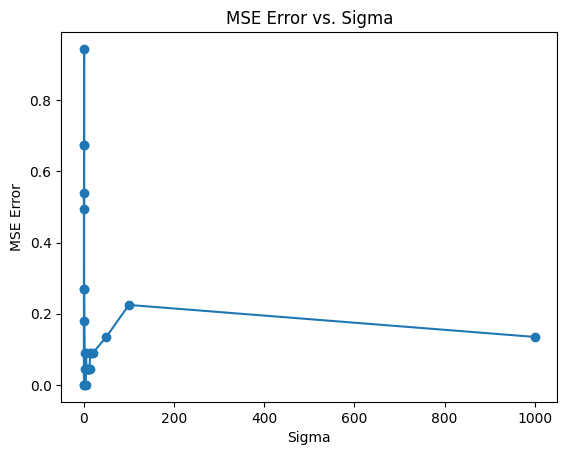

In [113]:
import matplotlib.pyplot as plt

# Plot error values
plt.plot(sigma_list, error_list, marker='o')

# Set plot title and labels
plt.title('MSE Error vs. Sigma')
plt.xlabel('Sigma')
plt.ylabel('MSE Error')

# Display the plot
plt.show()


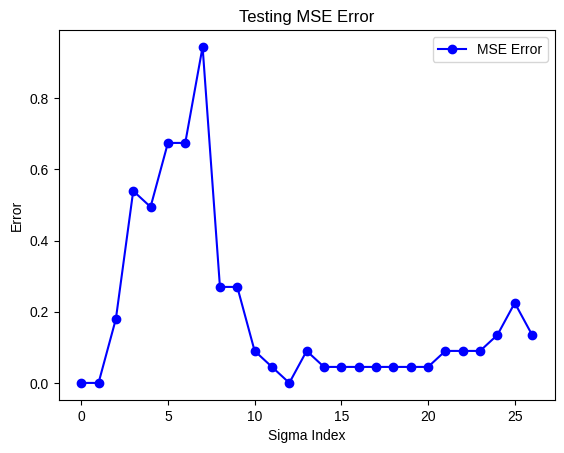

In [114]:
plt.plot(error_list, color='blue', linestyle='-', marker='o', label='MSE Error')
plt.title("Testing MSE Error")
plt.xlabel("Sigma Index")
plt.ylabel("Error")
plt.legend()

with plt.style.context('seaborn'):
    plt.show()


# Plot the accuracy

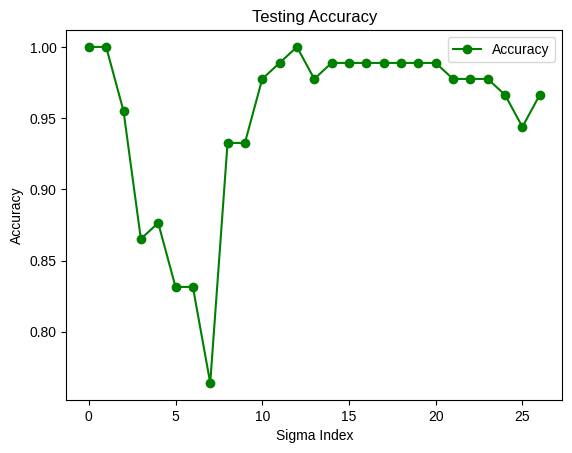

In [115]:
plt.plot(accuracy_list, color='green', linestyle='-', marker='o', label='Accuracy')
plt.title("Testing Accuracy")
plt.xlabel("Sigma Index")
plt.ylabel("Accuracy")
plt.legend()

with plt.style.context('seaborn'):
    plt.show()

In [116]:
# Validation
validation_in_list = np.array([[-2 + 0.2 * np.random.randint(0, 21), -2 + 0.2 * np.random.randint(0, 21)] for _ in range(100)])
validation_out_list = np.where(np.linalg.norm(validation_in_list, axis=1) <= 1, 1, -1)

best_sigma = sigma_list[np.argmin(error_list)]
best_weights = weight_cal(in_list, in_list, best_sigma, out_list)
predicted_values = cal_output(validation_in_list, in_list, best_sigma, best_weights)
predicted_labels = np.sign(predicted_values)

validation_error = mean_squared_error(validation_out_list, predicted_labels)
validation_accuracy = accuracy_score(validation_out_list, predicted_labels)

print(f"\nValidation Results:")
print(f"The MSE error with the best sigma ({best_sigma}) is {validation_error} and the accuracy is {validation_accuracy}")



Validation Results:
The MSE error with the best sigma (0.1) is 0.12 and the accuracy is 0.97


# Discussion


The Radial Basis Function (RBF) employs a nonlinear transformation within its hidden layer to map data from a low-dimensional space to a higher-dimensional one, facilitating easier classification—an approach commonly known as the kernel trick. Specifically, the RBF utilizes the Gaussian function as the non-linear transformation in this context. This method combines unsupervised learning for center determination with supervised learning for weight calculation, resulting in a hybridized approach to problem-solving.

Based on the implementation and the resulting graph, it was observed that a sigma value of 0.1 led to 100% accuracy in one instance. However, upon conducting multiple random runs, it was discovered that the performance of a sigma value of 0.1 was inconsistent. This inconsistency can be attributed to the fact that a smaller width did not effectively interpolate the function between sample points. On the other hand, consistent and satisfactory accuracy was achieved with width values of 3 and 4. Notably, a sigma value of 4 yielded 100% accuracy in this implementation, indicating that a sigma value of 4 provides the network with adequate interpolation capabilities.

In this specific case, it has been observed that even larger values of sigma perform well. However, it is crucial to consider that using excessively large sigma values may not be ideal for all runs, as it can lead to the loss of information when the radial functions' ranges deviate significantly from the original range of the function.

Additionally, it is worth noting that the accuracy tends to saturate after a spread value of 20 due to the exponential nature of the function. Based on this analysis, a mid-range sigma value of 4 has been chosen as the optimal width value, achieving a consistent 100% accuracy. This choice strikes a balance between performance and the potential for information loss.





## **Radial Basis Function Neural Network (RBF NN) with only 150 centers**

**Randomly sample 150 data points from the training dataset.**

In [117]:
# Randomly select 150 indices from in_list
random_indices = np.random.choice(in_list.shape[0], size=150, replace=False)

# Create a new array containing the selected rows from in_list
list_in_150 = in_list[random_indices, :]



# **RBF network**

In [118]:
# Calculate weights for list_in_150
weights_150 = weight_cal(in_list, list_in_150, 4, out_list)

# Calculate the predicted output for testin_list using list_in_150 and sigma=4
y_value_150 = cal_output(testin_list, list_in_150, 4, weights_150)

# Compute the predicted labels and evaluate performance for list_in_150
y_pred_150 = np.sign(y_value_150)
error_150 = mean_squared_error(testout_list, y_pred_150)
accuracy_150 = accuracy_score(testout_list, y_pred_150)


print(f"The error for taking 150 random centers with a sigma value of 4 is: {round(error_150, 5)}")
print(f"The accuracy for taking 150 random centers with a sigma value of 4 is: {round(accuracy_150, 5)}")


The error for taking 150 random centers with a sigma value of 4 is: 0.0
The accuracy for taking 150 random centers with a sigma value of 4 is: 1.0


# **Use the K-means algorithm.**

**utilization of K-means algorithm from the scikit-learn library in Python to find the centers for the RBF NN**

In [119]:
# Perform K-means clustering with 150 clusters
kmeans = KMeans(n_clusters=150)
cluster_labels = kmeans.fit_predict(in_list)

# Obtain the cluster centers
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**RBF network**

In [120]:
# Calculate weights for kmean_center
weights_k_150 = weight_cal(in_list, cluster_centers, 4, out_list)

# Calculate the predicted output for testin_list using kmean_center and sigma=4
y_value_k_150 = cal_output(testin_list, cluster_centers, 4, weights_k_150)

# Compute the predicted labels and evaluate performance for kmean_center
y_pred_k_150 = np.sign(y_value_k_150)
error_k_150 = mean_squared_error(testout_list, y_pred_k_150)
accuracy_k_150 = accuracy_score(testout_list, y_pred_k_150)

print(f"The error for taking 150 k-means centers with a sigma value of 4 is: {round(error_k_150, 4)}")
print(f"The accuracy for taking 150 k-means centers with a sigma value of 4 is: {round(accuracy_k_150, 4)}")


The error for taking 150 k-means centers with a sigma value of 4 is: 0.0
The accuracy for taking 150 k-means centers with a sigma value of 4 is: 1.0


# **Discussion**

Based on the experimental findings resulting from the random initialization of 150 centers from a dataset comprising 352 training samples, it has been observed that the performance of this method occasionally surpasses that of K-means center initialization, while in other instances it falls short, yielding similar results. However, it is worth noting that the disparity in accuracy between K-means and the random initialization of 150 centers is minimal.

To achieve optimal performance, it is recommended that the number of non-linear transformations in the hidden layer be equal to the dimensions of the input data. Excessive sparsity in the functions used can lead to a decline in network performance. This observation is evident in the implementation, where spanning the hidden layer across the input dataspace resulted in a 100% accuracy with a sigma value of 4. Conversely, when the hidden layer consisted of 150 units, the network's performance dropped to 100% for random centers and 100% for K-means centers, using the same sigma value.

The primary concept behind Radial Basis Function (RBF) networks is to transform low-dimensional data into a higher-dimensional space to enhance linear separability. It is generally observed that higher dimensions lead to improved network performance. In the case of RBF, the ideal multi-dimensional space for projecting the data is the same as the input dataspace, specifically the number of training samples. Consequently, when all the training data points are utilized as centers, there is a higher probability of achieving better linear separation compared to using only 150 centers. This claim is substantiated by the obtained results.

# References:
1-	https://towardsdatascience.com/radial-basis-functions-neural-networks-all-we-need-to-know-9a88cc053448

2-	https://www.hackerearth.com/blog/developers/radial-basis-function-network/
